<a href="https://colab.research.google.com/github/davemcg/scEiaD/blob/colab/colab/scVI_projection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Querying scEiaD with scVI
The Yosef Lab folks use the "reference" and "query" terms. In this case, reference is the scVI model built for scEiaD. Query is outside data. Your data. If you query (or project) your data with the scVI/scEiaD model, then you will get a set of latent dimensions that you use to make a UMAP visualization that will closely approximate the one hosted at https://plae.nei.nih.gov

In the future we will also share our xgboost model so you can label retina cell types data with our highly trained xgboost-based machine learning model. 

# Overview
1. Install scvi and kallisto-bustools
2. Download our kallisto index
3. Download our scVI model
4. Quantify SRA dataset X with kallisto-bustools
5. Querying SRA dataset with scVI




# Install scvi and kallisto-bustools

In [2]:
import sys

#if True, will install via pypi, else will install from source
stable = True
IN_COLAB = "google.colab" in sys.modules

if IN_COLAB and stable:
    !pip install --quiet scvi-tools[tutorials]
elif IN_COLAB and not stable:
    !pip install --quiet --upgrade jsonschema
    !pip install --quiet git+https://github.com/yoseflab/scvi-tools@master#egg=scvi-tools[tutorials]

!pip install kb-python


# Download our kallisto index
Human
Gencode v35 protein coding transcripts

In [ ]:
%%time
!wget -O idx.idx https://hpc.nih.gov/~mcgaugheyd/scEiaD/2020_12_31/gencode.v35.pc_transcripts.idx
!wget -O t2g.txt https://hpc.nih.gov/~mcgaugheyd/scEiaD/2020_12_31/tr2g.tsv

--2021-01-03 13:31:36--  https://hpc.nih.gov/~mcgaugheyd/scEiaD/2020_12_31/gencode.v35.pc_transcripts.idx
Resolving hpc.nih.gov (hpc.nih.gov)... 128.231.2.150, 2607:f220:418:4801::2:96
Connecting to hpc.nih.gov (hpc.nih.gov)|128.231.2.150|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1830021189 (1.7G) [application/octet-stream]
Saving to: ‘idx.idx’

idx.idx             100%[===================>]   1.70G  36.2MB/s    in 52s     

2021-01-03 13:32:29 (33.4 MB/s) - ‘idx.idx’ saved [1830021189/1830021189]

--2021-01-03 13:32:29--  https://hpc.nih.gov/~mcgaugheyd/scEiaD/2020_12_31/tr2g.tsv
Resolving hpc.nih.gov (hpc.nih.gov)... 128.231.2.150, 2607:f220:418:4801::2:96
Connecting to hpc.nih.gov (hpc.nih.gov)|128.231.2.150|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17192546 (16M) [application/octet-stream]
Saving to: ‘t2g.txt’

t2g.txt             100%[===================>]  16.40M  19.2MB/s    in 0.9s    

2021-01-03 13:32:31 (19.2 MB

#Quantify with kbtools (Kallisto - Bustools wrapper) in one easy step.
This will take ~5 minutes. So go make a cup of coffee.

In [ ]:
!kb count --h5ad -i idx.idx -g t2g.txt -x 10xv2 -o output --filter bustools -t 2 \
  https://hpc.nih.gov/~mcgaugheyd/scEiaD/2020_12_31/SRR10759478_1.fastq.gz \
  https://hpc.nih.gov/~mcgaugheyd/scEiaD/2020_12_31/SRR10759478_2.fastq.gz

[2021-01-03 13:34:40,302]    INFO Piping https://hpc.nih.gov/~mcgaugheyd/scEiaD/2020_12_31/SRR10759478_1.fastq.gz to output/tmp/SRR10759478_1.fastq.gz
[2021-01-03 13:34:40,303]    INFO Piping https://hpc.nih.gov/~mcgaugheyd/scEiaD/2020_12_31/SRR10759478_2.fastq.gz to output/tmp/SRR10759478_2.fastq.gz
[2021-01-03 13:34:40,304]    INFO Using index idx.idx to generate BUS file to output from
[2021-01-03 13:34:40,304]    INFO         output/tmp/SRR10759478_1.fastq.gz
[2021-01-03 13:34:40,304]    INFO         output/tmp/SRR10759478_2.fastq.gz
[2021-01-03 13:38:39,892]    INFO Sorting BUS file output/output.bus to output/tmp/output.s.bus
[2021-01-03 13:39:01,076]    INFO Whitelist not provided
[2021-01-03 13:39:01,076]    INFO Copying pre-packaged 10XV2 whitelist to output
[2021-01-03 13:39:02,604]    INFO Inspecting BUS file output/tmp/output.s.bus
[2021-01-03 13:39:10,547]    INFO Correcting BUS records in output/tmp/output.s.bus to output/tmp/output.s.c.bus with whitelist output/10xv2_whi

In [ ]:
import scvi
import scanpy as sc

sc.set_figure_params(figsize=(4, 4))

#adata = sc.read_h5ad('output/counts_filtered/adata.h5ad')
#!wget https://hpc.nih.gov/~mcgaugheyd/scEiaD/colab/adata.projected_scVI.h5ad
!wget https://hpc.nih.gov/~mcgaugheyd/scEiaD/2021_01_03/scEiaD.h5ad
#adata = sc.read_h5ad('adata.projected_scVI.h5ad')
adata_scEiaD = sc.read_h5ad('scEiaD.h5ad.2')
adata_scEiaD

--2021-01-04 17:47:09--  https://hpc.nih.gov/~mcgaugheyd/scEiaD/2021_01_03/scEiaD.h5ad
Resolving hpc.nih.gov (hpc.nih.gov)... 128.231.2.150, 2607:f220:418:4801::2:96
Connecting to hpc.nih.gov (hpc.nih.gov)|128.231.2.150|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2811082950 (2.6G) [application/octet-stream]
Saving to: ‘scEiaD.h5ad.3’

scEiaD.h5ad.3         9%[>                   ] 250.04M  41.3MB/s    eta 65s    

In [ ]:
import scvi
import scanpy as sc
adata_scEiaD = sc.read_h5ad('scEiaD.h5ad.2')
adata_scEiaD

In [3]:
!rm scEiaD.h5ad
#sc.pp.neighbors(adata, n_neighbors=10, use_rep = 'X_scVI')

In [5]:
adata_scEiaD.obs

,Barcode,UMAP_1,UMAP_2,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,batch,study_accession,Age,TechType,SA,S.Score,G2M.Score,Phase,cluster,subcluster,sample_accession,library_layout,organism,Platform,UMI,Tissue,Covariate,integration_group,TissueNote,CellType,Paper,SubCellType,sample,barcode,donor,region,TabulaMurisCellType,Method,Doublet.Probability,Doublet,doublet_score_scran,cluster.1,subcluster.1
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,AAAGATGCACAGCCCA_EGAF00004257560,-2.378913,14.492534,SeuratProject,2162.000000,742,6.382979,EGAD00001006350_10xv2_D3_Ch,EGAD00001006350,-2147483648,10xv2,EGAF00004257560,-0.086313,-0.085800,G1,46,98,EGAF00004257560,PAIRED,Homo sapiens,10xv2,YES,Choroid,D3_Ch,Mature,HS_D3_Ch_F_Lf_S1_lib1 Sample alias: Homo Sapie...,T-Cell,Cowan et al. 2020,TCell,NA,NA,NA,NA,NA,scVIprojectionSO,0.104478,FALSE,3.683637,46,98
1,AAATGCCGTCATACTG_EGAF00004257560,-5.694573,13.260528,SeuratProject,828.000000,379,4.468599,EGAD00001006350_10xv2_D3_Ch,EGAD00001006350,-2147483648,10xv2,EGAF00004257560,0.008686,-0.073036,S,23,113,EGAF00004257560,PAIRED,Homo sapiens,10xv2,YES,Choroid,D3_Ch,Mature,HS_D3_Ch_F_Lf_S1_lib1 Sample alias: Homo Sapie...,NA,NA,NA,NA,NA,NA,NA,NA,scVIprojectionSO,0.052632,FALSE,0.000000,23,113
2,AACTCCCTCGTTGACA_EGAF00004257560,-5.293061,13.599508,SeuratProject,2375.000000,887,8.042105,EGAD00001006350_10xv2_D3_Ch,EGAD00001006350,-2147483648,10xv2,EGAF00004257560,-0.045637,-0.059839,G1,23,113,EGAF00004257560,PAIRED,Homo sapiens,10xv2,YES,Choroid,D3_Ch,Mature,HS_D3_Ch_F_Lf_S1_lib1 Sample alias: Homo Sapie...,Monocyte,Cowan et al. 2020,MO_03,NA,NA,NA,NA,NA,scVIprojectionSO,0.071429,FALSE,22.688856,23,113
3,AACTCTTTCAAGGCTT_EGAF00004257560,-3.303857,8.151554,SeuratProject,1158.000000,439,6.822107,EGAD00001006350_10xv2_D3_Ch,EGAD00001006350,-2147483648,10xv2,EGAF00004257560,-0.064705,-0.124880,G1,0,36,EGAF00004257560,PAIRED,Homo sapiens,10xv2,YES,Choroid,D3_Ch,Mature,HS_D3_Ch_F_Lf_S1_lib1 Sample alias: Homo Sapie...,NA,NA,NA,NA,NA,NA,NA,NA,scVIprojectionSO,0.387755,FALSE,0.000000,0,36
4,AAGGTTCTCTCCAACC_EGAF00004257560,-2.416232,14.372373,SeuratProject,1806.000000,802,6.810631,EGAD00001006350_10xv2_D3_Ch,EGAD00001006350,-2147483648,10xv2,EGAF00004257560,-0.077136,-0.168564,G1,46,98,EGAF00004257560,PAIRED,Homo sapiens,10xv2,YES,Choroid,D3_Ch,Mature,HS_D3_Ch_F_Lf_S1_lib1 Sample alias: Homo Sapie...,Natural Killer,Cowan et al. 2020,NK,NA,NA,NA,NA,NA,scVIprojectionSO,0.046549,FALSE,703.941622,46,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752146,SRS4385779,8.081853,-1.677532,SeuratProject,3937.802361,1189,10.130402,SRP186396_SMARTSeq_v2_NA,SRP186396,4,SMARTSeq_v2,SRS4385779,0.003300,-0.042142,S,52,125,SRS4385779,PAIRED,Mus musculus,SMARTSeq_v2,NO,Retina,NA,Maturing,NA,NA,NA,NA,NA,NA,NA,NA,NA,scVIprojectionSO,0.129032,FALSE,64.000000,52,125
752147,SRS4385780,8.179063,-2.522963,SeuratProject,5515.005596,1218,8.186833,SRP186396_SMARTSeq_v2_NA,SRP186396,4,SMARTSeq_v2,SRS4385780,-0.039028,-0.062130,G1,52,125,SRS4385780,PAIRED,Mus musculus,SMARTSeq_v2,NO,Retina,NA,Maturing,NA,NA,NA,NA,NA,NA,NA,NA,NA,scVIprojectionSO,0.081081,FALSE,1.629630,52,125
752148,SRS4385781,7.905297,-1.150114,SeuratProject,12122.683899,2220,3.265294,SRP186396_SMARTSeq_v2_NA,SRP186396,4,SMARTSeq_v2,SRS4385781,-0.108291,-0.159884,G1,52,125,SRS4385781,PAIRED,Mus musculus,SMARTSeq_v2,NO,Retina,NA,Maturing,NA,NA,NA,NA,NA,NA,NA,NA,NA,scVIprojectionSO,0.200000,FALSE,3.850099,52,125


In [9]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [10]:
sc.tl.umap(adata, min_dist=0.2)


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'Barcode' as categorical


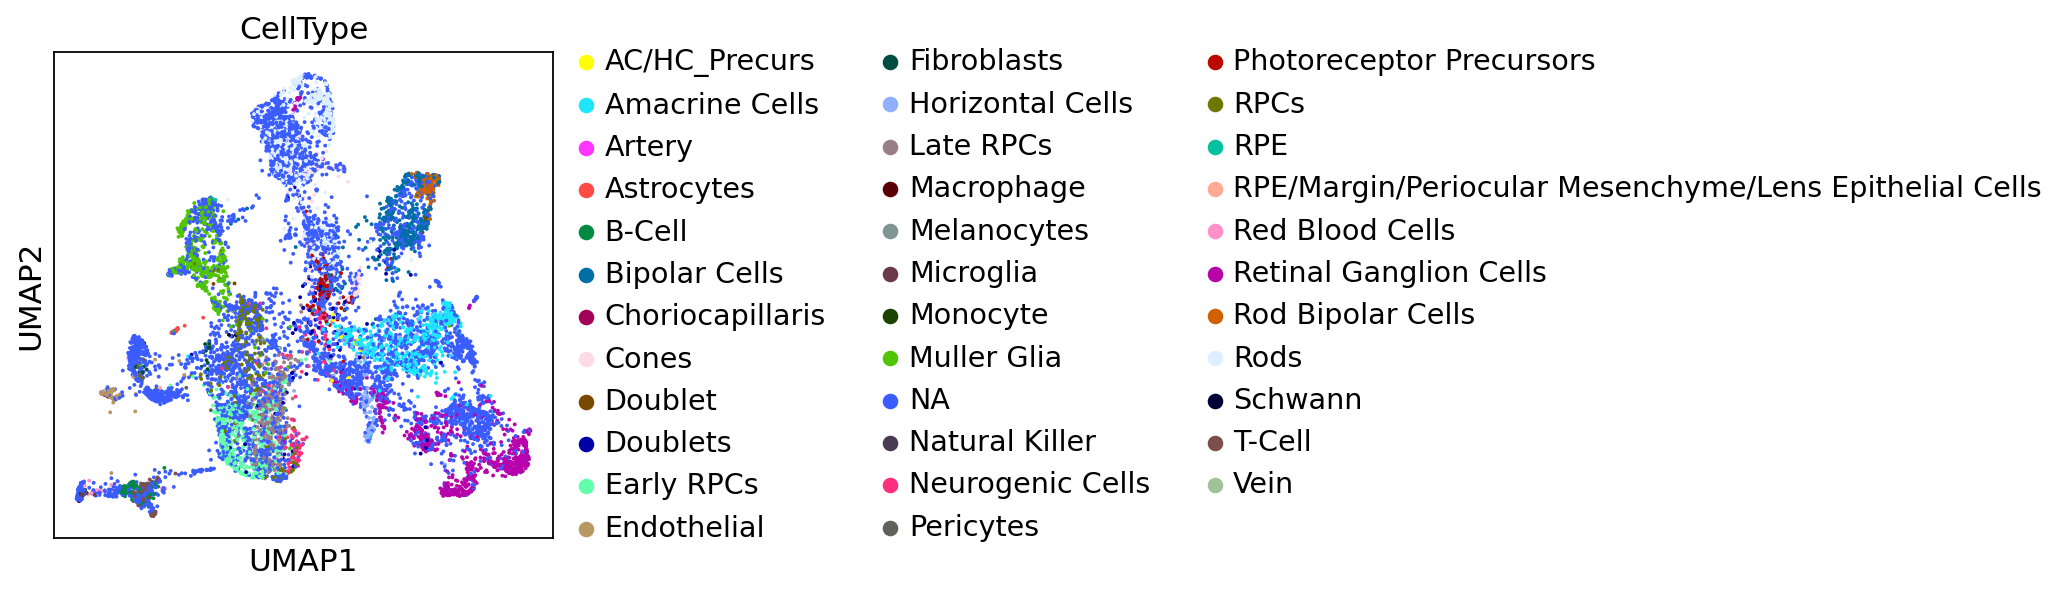

In [24]:
from random import randint
rand_cells = [randint(0, adata_scEiaD.n_obs) for p in range(0, 10000)]
rand_cells
adata_scEiaD_cutdown = adata_scEiaD[rand_cells,:]
adata_scEiaD_cutdown.obs_names_make_unique
sc.pp.neighbors(adata_scEiaD_cutdown, n_neighbors=50, use_rep = 'X_scvi')
sc.tl.umap(adata_scEiaD_cutdown, min_dist=0.2)
sc.pl.umap(adata_scEiaD_cutdown, color = 'CellType')

/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:1208: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'Barcode' as categorical


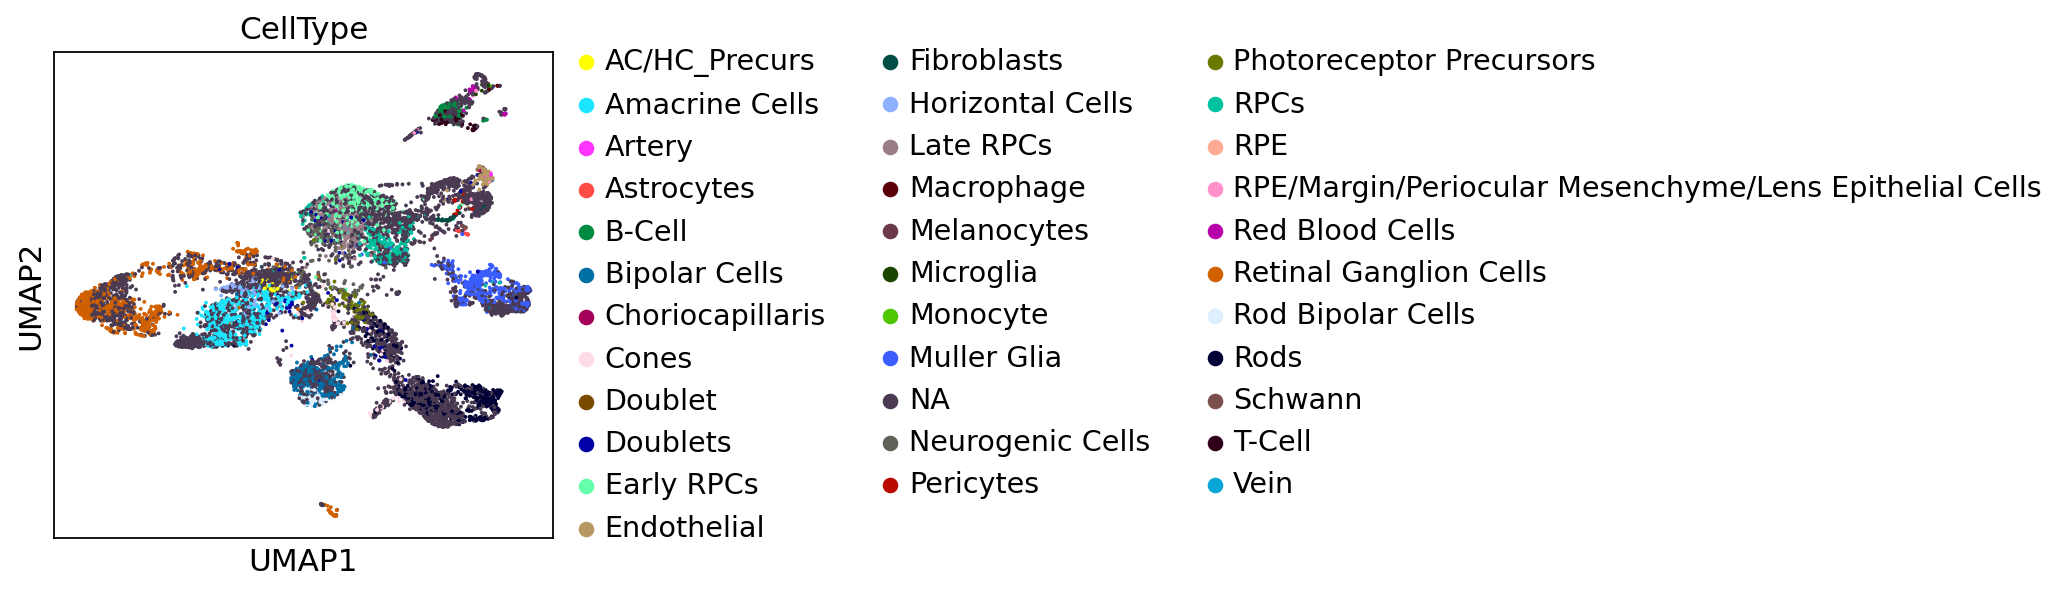

In [19]:
#sc.pl.umap(adata, color=['ENSG00000105392', 'ENSG00000144485', 'ENSG00000016082'])
adata_scEiaD.obsm['X_umap'] = adata_scEiaD.obsm['X_scviumap']
sc.pl.umap(adata_scEiaD_cutdown, color = 'CellType')

## Loading and preparing data

Let us first load the CORTEX dataset described in Zeisel et al. (2015). scvi-tools has many "built-in" datasets as well as support for loading arbitrary `.csv`, `.loom`, and `.h5ad` (AnnData) files. Please see our tutorial on [data loading](data_loading.ipynb) for more examples.

* Zeisel, Amit, et al. "Cell types in the mouse cortex and hippocampus revealed by single-cell RNA-seq." Science 347.6226 (2015): 1138-1142. 

<div class="alert alert-info">
Important

All scvi-tools models require AnnData objects as input. 

</div>

In [ ]:
adata = scvi.data.cortex(run_setup_anndata=False)

INFO      File /content/data/expression.bin already downloaded                  
INFO      Loading Cortex data from /content/data/expression.bin                 
INFO      Finished loading Cortex data                                          


/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Now we preprocess the data to remove, for example, genes that are very lowly expressed and other outliers. For these tasks we prefer the [Scanpy preprocessing module](https://scanpy.readthedocs.io/en/stable/api/index.html#module-scanpy.pp).

In [ ]:
sc.pp.filter_genes(adata, min_counts=3)

/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In scRNA-seq analysis, among others, it's popular to normalize the data. These values are not used by scvi-tools, but given their popularity in other tasks as well as for visualization, we store them in the anndata object separately (via the `.raw` attribute).

<div class="alert alert-info">

Important

Unless otherwise specific, scvi-tools models require the raw counts.

</div>

In [ ]:
adata.layers["counts"] = adata.X.copy() # preserve counts
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata # freeze the state in `.raw`

Finally, we perform feature selection, to reduce the number of features (genes in this case) used as input to the scvi-tools model. For best practices of how/when to perform feature selection, please refer to the model-specific tutorial.

In [ ]:
sc.pp.highly_variable_genes(
    adata, 
    n_top_genes=2000, 
    subset=True, 
    layer="counts", 
    flavor="seurat_v3"
)

/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/usr/local/lib/python3.6/dist-packages/scanpy/preprocessing/_highly_variable_genes.py:144: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  df.loc[: int(n_top_genes), 'highly_variable'] = True


Now it's time to run `setup_anndata()`, which alerts scvi-tools to the locations of various matrices inside the anndata. It's important to run this function with the correct arguments so scvi-tools is notified that your dataset has batches, annotations, etc. For example, if batches are registered with scvi-tools, the subsequent model will correct for batch effects. See the full documentation for details.



In [ ]:
scvi.data.setup_anndata(adata, layer="counts")

INFO      No batch_key inputted, assuming all cells are same batch              
INFO      No label_key inputted, assuming all cells have same label             
INFO      Using data from adata.layers["counts"]                                
INFO      Computing library size prior per batch                                
INFO      Successfully registered anndata object containing 3005 cells, 2000    
          vars, 1 batches, 1 labels, and 0 proteins. Also registered 0 extra    
          categorical covariates and 0 extra continuous covariates.             
INFO      Please do not further modify adata until model is trained.            


/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


<div class="alert alert-warning">

Warning

If the adata is modified after running `setup_anndata`, please run `setup_anndata` again.

</div>

## Creating and training a model

While we highlight the scVI model here, the API is consistent across all scvi-tools models and is inspired by that of [scikit-learn](https://scikit-learn.org/stable/). For a full list of options, see the scvi [documentation](https://scvi-tools.org).

In [ ]:
model = scvi.model.SCVI(adata)

We can see an overview of the model by printing it.

In [ ]:
model

SCVI Model with the following params: 
n_hidden: 128, n_latent: 10, n_layers: 1, dropout_rate: 0.1, dispersion: gene, 
gene_likelihood: zinb, latent_distribution: normal
Training status: Not Trained


To print summary of associated AnnData, use: 
scvi.data.view_anndata_setup(model.adata)


In [ ]:
model.train()

INFO      Training for 400 epochs                                               
INFO      KL warmup for 400 epochs                                              
Training...: 100%|██████████| 400/400 [01:35<00:00,  4.18it/s]
INFO      Training time:  95 s. / 400 epochs                                    


### Saving and loading

Saving consists of saving the model neural network weights, as well as parameters used to initialize the model.

In [ ]:
model.save("my_model/")

In [ ]:
model = scvi.model.SCVI.load("my_model/", adata, use_cuda=True)

INFO      Using data from adata.layers["counts"]                                
INFO      Computing library size prior per batch                                
INFO      Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 
          'labels']                                                             
INFO      Successfully registered anndata object containing 3005 cells, 2000    
          vars, 1 batches, 1 labels, and 0 proteins. Also registered 0 extra    
          categorical covariates and 0 extra continuous covariates.             


/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


## Obtaining model outputs

In [ ]:
latent = model.get_latent_representation()

It's often useful to store the outputs of scvi-tools back into the original anndata, as it permits interoperability with Scanpy.

In [ ]:
adata.obsm["X_scVI"] = latent

The `model.get...()` functions default to using the anndata that was used to initialize the model. It's possible to also query a subset of the anndata, or even use a completely independent anndata object as long as the anndata is organized in an equivalent fashion.

In [ ]:
adata_subset = adata[adata.obs.cell_type == "interneurons"]
latent_subset = model.get_latent_representation(adata_subset)

INFO      Received view of anndata, making copy.                                


/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [ ]:
denoised = model.get_normalized_expression(adata_subset, library_size=10e4)
denoised.iloc[:5, :5]

INFO      Received view of anndata, making copy.                                


,Tshz1,2310042E22Rik,Sema3c,Jam2,Klhl13
0,34.172291,11.900369,226.214600,36.507690,103.343269
1,31.713140,28.055269,204.428802,13.279721,106.054047
2,18.533686,31.503839,612.331909,78.135330,202.348083
3,25.587479,51.464203,241.749634,18.102861,148.764862
4,68.990685,26.903820,157.888565,10.193274,138.968933


Let's store the normalized values back in the anndata.

In [ ]:
adata.layers["scvi_normalized"] = model.get_normalized_expression(
    library_size=10e4
)

## Interoperability with Scanpy

Scanpy is a powerful python library for visualization and downstream analysis of scRNA-seq data. We show here how to feed the objects produced by scvi-tools into a scanpy workflow.

In [ ]:
# use scVI latent space for UMAP generation
sc.pp.neighbors(adata, use_rep="X_scVI")
sc.tl.umap(adata, min_dist=0.2)

/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'precise_labels' as categorical
... storing 'cell_type' as categorical


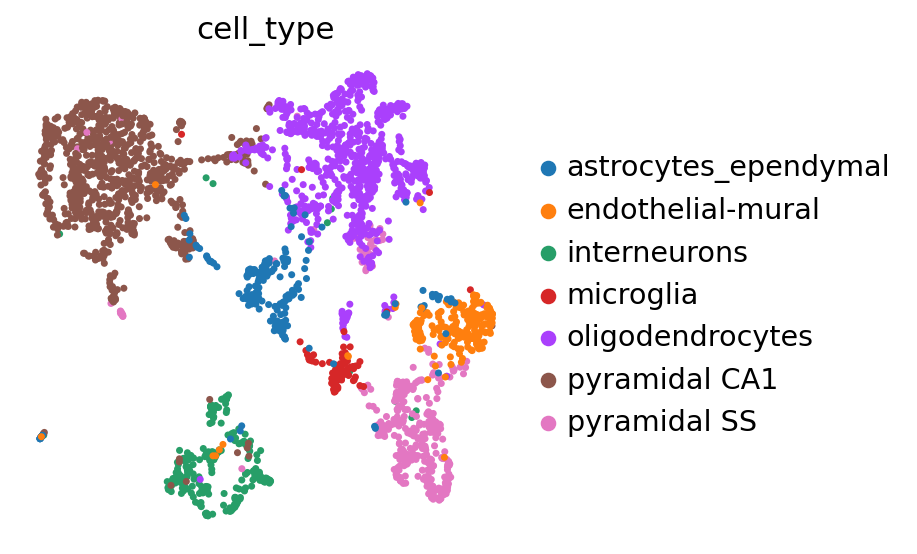

In [ ]:
sc.pl.umap(
    adata, 
    color="cell_type", 
    frameon=False,
)

The user will note that we imported curated labels from the original publication. Our interface with scanpy makes it easy to cluster the data with scanpy from scVI's latent space and then reinject them into scVI (e.g., for differential expression).

In [ ]:
# neighbors were already computed using scVI
sc.tl.leiden(adata, key_added="leiden_scVI")

## Differential expression
We can also use many scvi-tools models for differential expression. For further details on the methods underlying these functions as well as additional options, please see TODO.

In [ ]:
adata.obs.cell_type.head()

0    interneurons
1    interneurons
2    interneurons
3    interneurons
4    interneurons
Name: cell_type, dtype: category
Categories (7, object): ['astrocytes_ependymal', 'endothelial-mural', 'interneurons', 'microglia',
                         'oligodendrocytes', 'pyramidal CA1', 'pyramidal SS']

For example, a 1-vs-1 DE test is as simple as:

In [ ]:
de_df = model.differential_expression(
    groupby="cell_type", 
    group1="oligodendrocytes", 
    group2="pyramidal CA1"
)
de_df.head()

DE...: 100%|██████████| 1/1 [00:04<00:00,  4.15s/it]


,proba_de,proba_not_de,bayes_factor,scale1,scale2,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison
Icam5,1.0000,0.0000,18.420681,0.000086,0.002353,-5.376781,-5.626368,1.348573,-8.737123,0.671820,0.115854,4.640043,0.080488,0.926518,0.539940,27.065977,True,oligodendrocytes vs pyramidal CA1
Mmd,1.0000,0.0000,18.420681,0.000168,0.004009,-5.045812,-5.215079,1.250184,-7.987005,0.296421,0.229268,7.690096,0.137805,0.977636,1.022028,45.961216,True,oligodendrocytes vs pyramidal CA1
Slc8a1,0.9998,0.0002,8.516943,0.000605,0.010312,-4.304520,-4.428328,1.018000,-7.192300,-0.163869,1.060976,20.086262,0.352439,0.991480,4.516073,115.609520,True,oligodendrocytes vs pyramidal CA1
Dgkg,0.9998,0.0002,8.516943,0.000261,0.004208,-4.193096,-4.263711,0.982092,-7.841075,0.419635,0.126829,8.155484,0.065854,0.975506,0.540623,51.665966,True,oligodendrocytes vs pyramidal CA1
Ddn,0.9998,0.0002,8.516943,0.000260,0.003778,-4.110078,-4.163136,1.127335,-8.934053,1.917148,0.218293,7.184238,0.098780,0.957401,0.879565,44.778248,True,oligodendrocytes vs pyramidal CA1


We can also do a 1-vs-all DE test, which compares each cell type with the rest of the dataset:

In [ ]:
de_df = model.differential_expression(
    groupby="cell_type", 
)
de_df.head()

DE...: 100%|██████████| 7/7 [00:29<00:00,  4.28s/it]


,proba_de,proba_not_de,bayes_factor,scale1,scale2,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison
Cml5,0.9948,0.0052,5.253881,0.000679,0.000012,7.754991,7.963428,3.569530,-6.690024,18.151081,0.156250,0.005034,0.062500,0.003955,1.048622,0.019568,True,astrocytes_ependymal vs Rest
Slc1a3,0.9942,0.0058,5.144079,0.015234,0.000961,4.861070,4.972892,1.940111,-2.869020,10.098665,30.156250,1.977346,0.982143,0.281194,211.173355,9.182883,True,astrocytes_ependymal vs Rest
Gja1,0.9926,0.0074,4.898846,0.006811,0.000438,5.315531,5.546753,2.188639,-2.315550,11.194177,12.705358,0.822006,0.977679,0.186624,88.167435,3.939137,True,astrocytes_ependymal vs Rest
Aqp4,0.9924,0.0076,4.871977,0.008168,0.000467,4.673203,4.821848,1.884676,-3.284332,9.616211,20.973215,0.598706,0.937500,0.112549,120.902222,2.687396,True,astrocytes_ependymal vs Rest
Obox6,0.9912,0.0088,4.724163,0.001497,0.000035,6.220726,6.289189,3.109761,-5.672326,15.472239,0.017857,0.002517,0.004464,0.001798,0.452080,0.017143,True,astrocytes_ependymal vs Rest


We now extract top markers for each cluster using the DE results.

In [ ]:
markers = {}
cats = adata.obs.cell_type.cat.categories
for i, c in enumerate(cats):
    cid = "{} vs Rest".format(c)
    cell_type_df = de_df.loc[de_df.comparison == cid]
    cell_type_df = cell_type_df.sort_values("lfc_mean", ascending=False)

    cell_type_df = cell_type_df[cell_type_df.lfc_mean > 0]

    cell_type_df = cell_type_df[cell_type_df["bayes_factor"] > 3]
    cell_type_df = cell_type_df[cell_type_df["non_zeros_proportion1"] > 0.1]

    markers[c] = cell_type_df.index.tolist()[:3]

In [ ]:
sc.tl.dendrogram(adata, groupby="cell_type", use_rep="X_scVI")

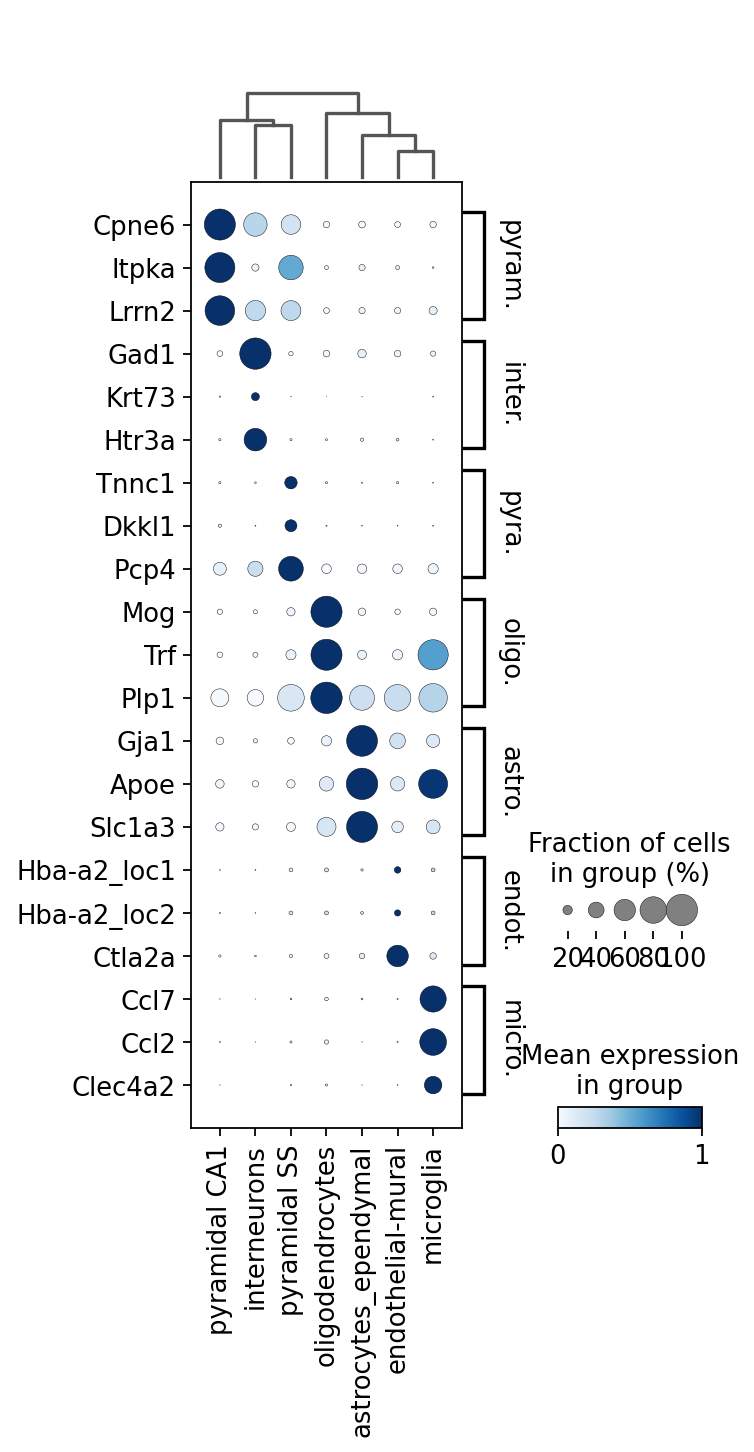

In [ ]:
sc.pl.dotplot(
    adata, 
    markers, 
    groupby='cell_type', 
    dendrogram=True, 
    color_map="Blues",
    swap_axes=True,
    use_raw=True,
    standard_scale="var",
)

We can also visualize the scVI normalized gene expression values with the `layer` option.

         Falling back to preprocessing with `sc.pp.pca` and default params.


/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


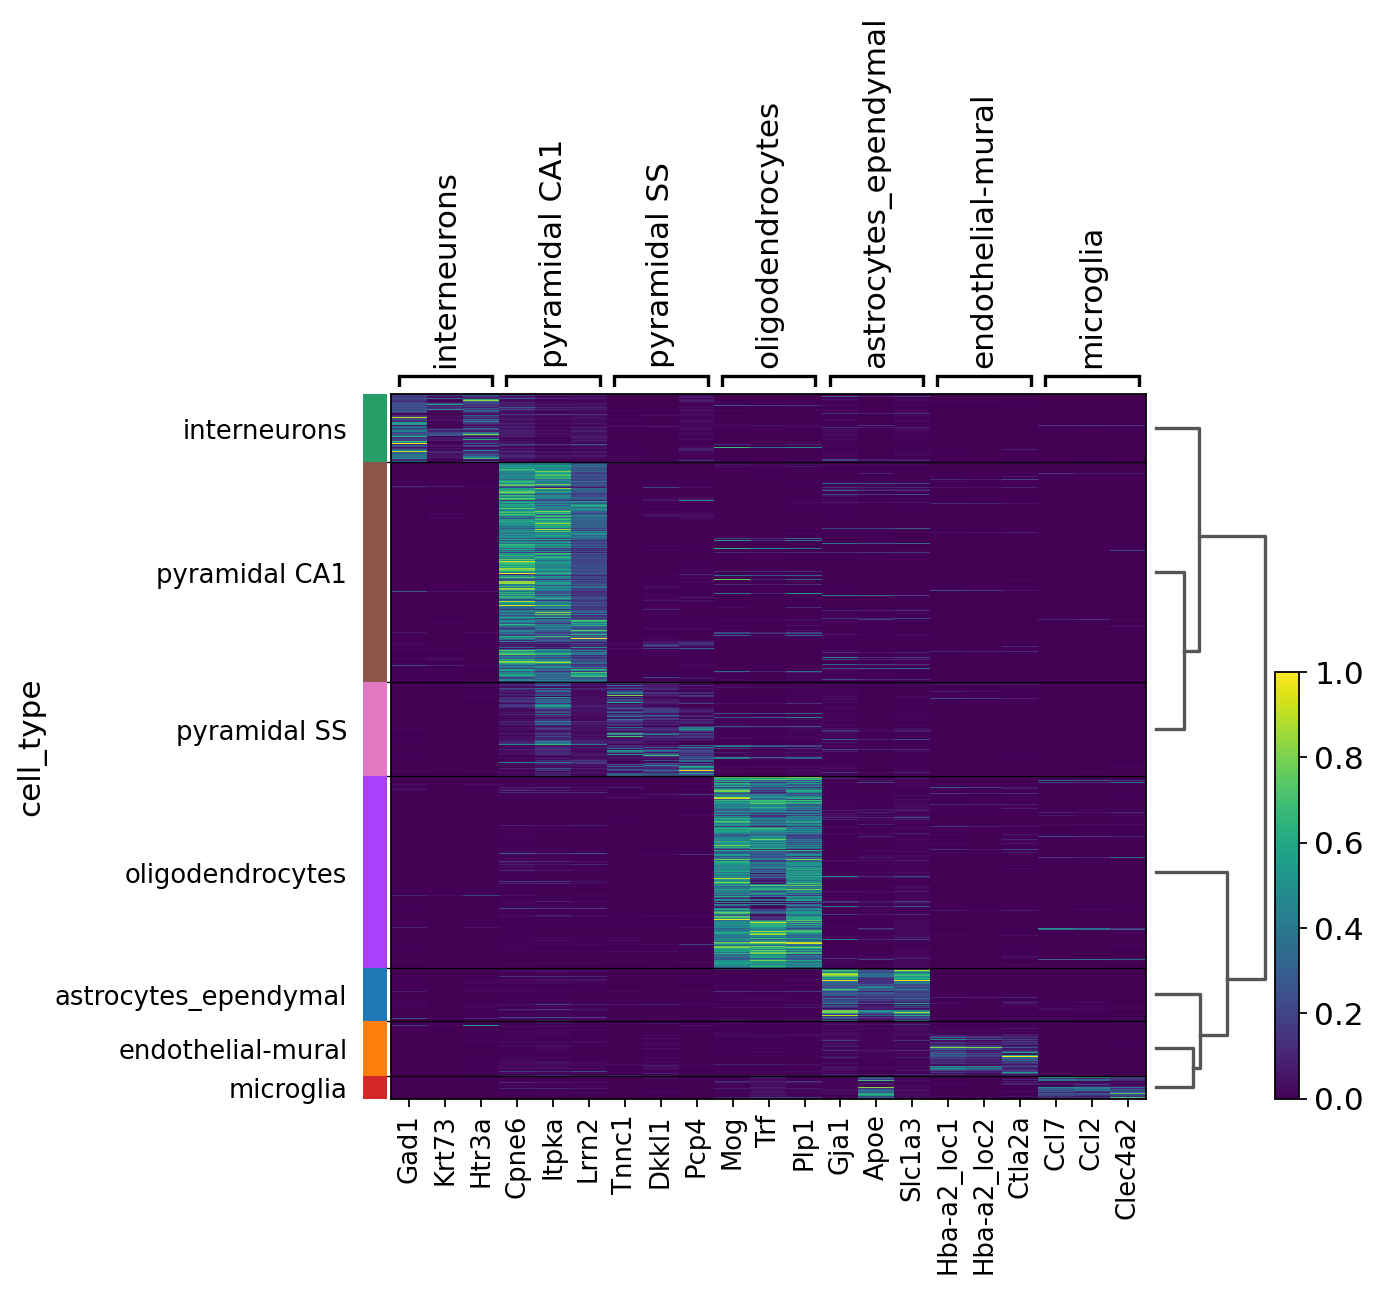

In [ ]:
sc.pl.heatmap(
    adata, 
    markers, 
    groupby='cell_type', 
    layer="scvi_normalized",
    standard_scale="var",
    dendrogram=True,
)

## Logging information

Verbosity varies in the following way:

* `logger.setLevel(logging.WARNING)` will show a progress bar.
* `logger.setLevel(logging.INFO)` will show global logs including the number of jobs done.
* `logger.setLevel(logging.DEBUG)` will show detailed logs for each training (e.g the parameters tested).

This function's behaviour can be customized, please refer to its documentation for information about the different parameters available.

In general, you can use `scvi.settings.verbosity` to set the verbosity of the scvi package.
Note that `verbosity` corresponds to the logging levels of the standard python `logging` module. By default, that verbosity level is set to `INFO` (=20).
As a reminder the logging levels are:

<table class="docutils align-center">
<colgroup>
<col style="width: 48%">
<col style="width: 52%">
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p>Level</p></th>
<th class="head"><p>Numeric value</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">CRITICAL</span></code></p></td>
<td><p>50</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">ERROR</span></code></p></td>
<td><p>40</p></td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">WARNING</span></code></p></td>
<td><p>30</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">INFO</span></code></p></td>
<td><p>20</p></td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">DEBUG</span></code></p></td>
<td><p>10</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">NOTSET</span></code></p></td>
<td><p>0</p></td>
</tr>
</tbody>
</table>